### This Notebook is Designed to Walkthrough Lesson 3 in Machine Learning

### Decision Trees in Python

### Import Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Load Data: 
This Data is built into the seaborn package


In [4]:
iris = sns.load_dataset('iris')

Use the .head() to view the data

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Data Wrangling

Specify the x and y variables using subsetting. y is the column you are predicting, and x is everything being using to predict it.

In [9]:
x = iris.drop('species', axis=1)
y = iris['species']

### Train Test Split

Split the data into training and testing sets. The train variables are creating the initial model, and the test variables are what will be used to determine the fit of the model. Note that just for following along, set the random_state to 76, which is not necessary, but it will give the same result as the example.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

### Create Initial Decision Tree

In [11]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

### Assess the Model

Create a set of predictions and interpret the results. Start by using the predict() function, and then utilize the same confusion matrix and classification report coding as in previous lesson.

In [12]:
treePredictions = decisionTree.predict(x_test)

### Print Confusion Matrix

In [13]:
print(confusion_matrix(y_test, treePredictions))

[[19  0  0]
 [ 0 10  3]
 [ 0  2 11]]


The variables on the top represent the actual values, and the variables on the side represent the predicted values.

In [15]:

#                        setosa (actual)    versicolor (actual)  virginica (actual)
#setosa (predicted)            19                   0                     0
#versicolor (predicted)        0                    10                    3
#virginica (predicted)         0                    2                     11

In the upper left corner is the number 19. Because this is marked setosa both in the column and the row, that means that these are the predictions that were right! So, 19 irises were classified as the species setosa and actually were a setosa. Moving to the next column, same row, is the number 0. This means that there were no irises in the setosa species that were accidentally classified as versicolor. Similarly, in the third column, there were no irises accidentally classified in our model as virginica.

If you move on to the second row, for versicolor, you can see that no versicolor irises were accidentally misclassified as setosa. In the next column, you can note that 10 irises were versicolor, and actually were classified as versicolor. Then in the last column, you see that there were three versicolor irises that were misclassified as virginica species instead.

For the third row, there were no virginica irises misclassified as setosa, there were two misclassified as versicolor, and there were eleven properly classified as virginica.

So this decision tree model is really good at predicting the species of setosa, but misclassified a few of the versicolor species as virginica and vice versa.

(page 4)

<img src="https://miro.medium.com/max/700/1*uo6VfVH87jRjMZWVdwq3Vw.png" jsaction="load:XAeZkd;" jsname="HiaYvf" class="n3VNCb" alt="Nivitus | Medium" data-noaft="1" style="width: 450px; height: 201.214px; margin: 0px;">

In [39]:
#source of above image: https://miro.medium.com/max/700/1*uo6VfVH87jRjMZWVdwq3Vw.png

### How Well Does your Model Fit?

In [16]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.83      0.77      0.80        13
   virginica       0.79      0.85      0.81        13

    accuracy                           0.89        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.89      0.89      0.89        45



First look at precision. Precision is the total number of true positives are divided by the total of positives, whether true or false.

Next, look at recall. So instead of putting the true positives over all positives, you put it over the sum of the true positives and the false negatives.

Then, look at the F1-score. F1 is equal to 2x precision x recall / precision + recall. Please review the formulas on page 4. 

So setosa was predicted with 100% precision, while versicolor was predicted with 83% accuracy and virginica was predicted with 79% accuracy! We can predict the species of the flower with 89% accuracy.

### Random Forest in Python

We did one tree now we will do a forest!

### Import Packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Load Data

In [18]:
iris = sns.load_dataset('iris')

### Data Wrangling
Subsetting the Data again

In [19]:
x = iris.drop('species', axis=1)
y = iris['species']
#We are dropping the species column to use it as the predictor variable

### Test Train Split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

### Initial Random Forest Model

We will use the RandomForestClassifer(), with the arguments n_estimators= to specify how many decision trees we want the random forest to stem from, and random_state= just to follow along with this example:



In [21]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

The n_estimators=, which we have set to 500 means we will be testing our data with 500 decision trees. In general, the higher the n_estimators=, the more accurate the model will be.

### Evaluate Model Fit

Using both the confusion matrix and classification report again here 

In [22]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



The model is 96% accurate. There is 100% accuracy for both setosa and versicolor irises, but only 87% accuracy for virginica.

### Hyperparameter Tuning in Python

In machine learning, parameters are the components of the model. Parameters that are adjustable are called hyperparameters.

### Load Additional Package

In [23]:
from sklearn.model_selection import RandomizedSearchCV

There are four hyperparameters for decision trees and random forests that are important:

-Maximum depth: how far down the "roots" of your tree go. How many nodes do you allow?

-Number of estimators: determining how many trees to be using.

-Maximum number of features: A feature is the decision points, or branches, on the tree.

-Minimum number of samples for a leaf: The minimum number of samples is how many data points are being sorted at each feature. 
(page 6/7)

### Number of Estimators

1) Determine how many trees you will be using. 

2) Create an array that contains the most likely number of estimators, which is what is shown in the first line of code below.

3) Then create an empty list named results that will end up filled using a for loop!

4) Then the for loop, this iterates over your n_estimators_array and creates a random forest for each, prints out the accuracy for each, and finally adds it to your results list. The very last line in the for loop prints out each result as it becomes available. (page 7)

In [24]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9111111111111111
4 : 0.9555555555555556
5 : 0.9333333333333333
8 : 0.9555555555555556
10 : 0.9777777777777777
20 : 0.9555555555555556
50 : 0.9555555555555556
75 : 0.9555555555555556
100 : 0.9555555555555556
250 : 0.9555555555555556
500 : 0.9555555555555556


So it looks like the best accuracy arises when you use only 10 trees instead of the standard 500! 

To view this result visually:

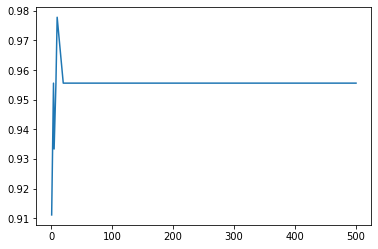

In [25]:
plt.plot(n_estimators_array, results)

We see from this graph that things have completely stagnated before 100 trees, so it certainly is a waste of processing power to request 500.

### Tuning the Remaining Three

Below you are creating lists with all the hyperparameter values you want to trial. There is one for each of the remaining three features, named: max_features, max_depth, and min_samples_leaf. Then, you'll create a dictionary with the hyperparameter names as the keys and the list variables as the values. This is called a grid and is aptly named random_grid.(page 7)

In [27]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


Preparing to initialize one random forest for every one of those hyperparameters in the random_grid. Since you know that you only want ten trees, the first line sets up a random forest model with that.

The next line of code gives you a random search of the random_grid you created using the function RandomizedSearchCV(). The arguments for that function include the estimator=, which is what you've named your latest iteration of the random forest with only ten estimators, the param_distributions= argument, which is where you plug in the random_grid dictionary, n_iter=, which is the number of iterations, or times to complete the random forest, and lastly, the cv= argument, which allows you to choose how many folds you'd like in your cross validation. The random_state= argument is not required to run code, but including it means that your results should be the same as those in the lesson.

In [29]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

### Fit the model

In [30]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

### See which Hyperparameter Produced the Best Result

In [31]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}

This is showing the best parameters were to have 2 leafs per sample, no max features, and a maxium depth of 20.

Applying those parameters:

In [33]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=2, max_features=None, max_depth=20)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_leaf=2,
                       n_estimators=10)

In [34]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Overall accuracy is 98%

### Feature Importance
(One of my favorite parts of ML!!)

Evaluating the feature importance just means that you can figure out which variable makes more difference to the prediction of the y.

In [35]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.007823
sepal_width     0.003542
petal_length    0.553005
petal_width     0.435630
dtype: float64

The sort_values() function will sort them. The inplace=True argument, like always, makes this change permanent, and ascending=False means that this goes from largest to smallest.

In [36]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_length    0.553005
petal_width     0.435630
sepal_length    0.007823
sepal_width     0.003542
dtype: float64


View the results in a little graph:

<AxesSubplot:>

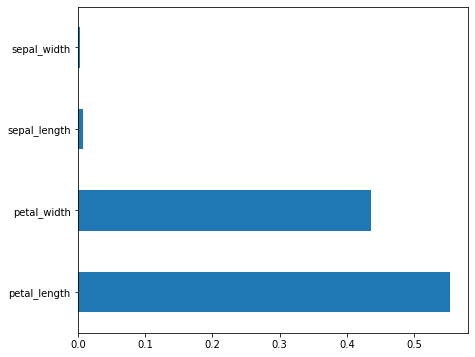

In [37]:
feature_importances.plot(kind='barh', figsize=(7,6))

This makes it really easy to see which variable(s) was the top predictors of y.

Hope you enjoyed this walkthrough of Lesson 3 from ML! Explanation verbage from pages 4-8:) <3 Mia